In [1]:
import sys
sys.path.insert(1,'../')
import plotting_functions as pmf

# sys.path.append('/home/arnau/documents/ETHZ/MScThesis/pyOPALTools')
# from opal.parser.H5Parser import H5Parser
import h5py

import matplotlib.pyplot as plt

# Such that backgrounds of plots are white, rather than transparent
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

import numpy as np
import pandas as pd

fs = 15

## Plot longitudinal phase space (LPS) before and after the bunch has gone through the wiggler

spos =  [3.31505572]


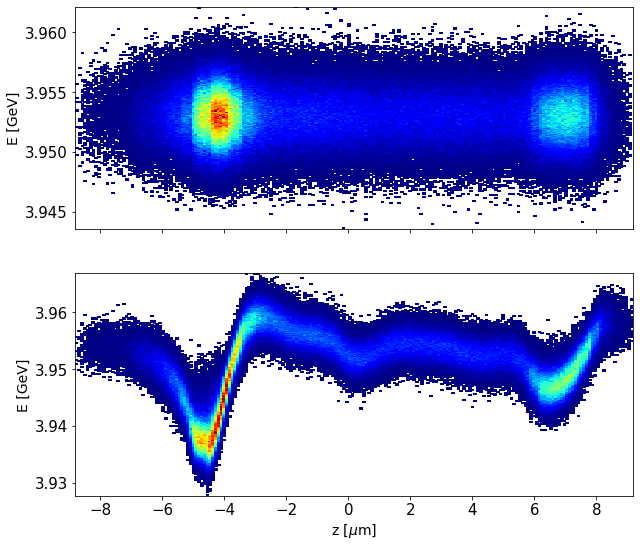

In [30]:
fig, axs = plt.subplots(2,1,figsize=(10,9), sharex = True)

# Plot initial bunch distribution
df = pd.read_csv('simulation/initialDistro.in', skiprows = 1, names = ['x', 'px', 'y', 'py', 'z', 'pz'], sep = '\t')
x = df['z']
y = df['pz'] * .511e6
x -= np.mean(x)
pmf.plotScreenXY(axs[0], x, y, ['z', 'E'], type = 'hist2d', factors = [1e6, 1e-9], 
                 nbins = 200, enable_cbar = 0)

# Plot final bunch distribution
f = h5py.File('simulation/LCLS.h5', 'r')
print('spos = ', f['Step#0'].attrs['SPOS'])
x = np.asarray(f['Step#0/z'])
x -= np.mean(x)
y = .511e6 * np.asarray(f['Step#0/pz'])
pmf.plotScreenXY(axs[1], x, y, ['z', 'E'], type = 'hist2d', factors = [1e6, 1e-9], 
                 nbins = 200, enable_cbar = 0)

axs[0].set_xlabel('')
axs[1].tick_params( axis = 'both', labelsize = fs )
axs[0].tick_params( axis = 'both', labelsize = fs )
# plt.savefig( ('LPS_before_after.png'), bbox_inches='tight' )  
plt.show()

spos =  [3.31505572]


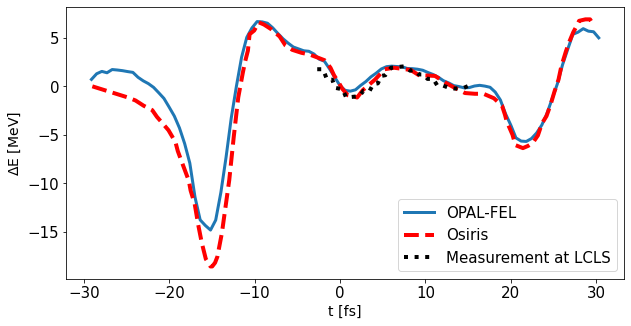

In [31]:
fig, ax = plt.subplots(figsize = (10,5))

# Plot final bunch distribution
f = h5py.File('simulation/LCLS.h5', 'r')
print('spos = ', f['Step#0'].attrs['SPOS'])
x = np.asarray(f['Step#0/z'])
x -= np.mean(x)
y = .511e6 * np.asarray(f['Step#0/pz'])
x /= -3e8  # m to s

pmf.plotScreenXY(ax, x, y, ['t', 'E'], type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 0, lw = 3)

# Plot data from paper
shift = 29  # Shift data horizontally
osiris = pd.read_csv('plots_from_MacArthur_paper/Osiris.csv', names = ['t', 'dE'])
osiris = osiris.sort_values( by = ['t']  )
ax.plot(osiris['t'] - shift, osiris['dE'], lw = 4, ls = '--', color = 'red')

meas = pd.read_csv('plots_from_MacArthur_paper/Measurement.csv', names = ['t', 'dE'])
meas = meas.sort_values( by = ['t']  )
ax.plot(meas['t'] - shift, meas['dE'], lw = 4, ls = ':', color = 'black')

ax.legend(['OPAL-FEL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)
ax.tick_params( axis = 'both', labelsize = fs )
# plt.savefig('LPS_comparison.png', bbox_inches='tight' )    
plt.show()